<a href="https://colab.research.google.com/github/Marko19907/ML-assignments/blob/main/A1-Mushroom-Classification/A1_Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Get the mushroom data

In [ ]:
# Download the dataset from my Google Drive
# Taken from https://www.kaggle.com/datasets/uciml/mushroom-classification
!gdown https://drive.google.com/uc?id=1ZyCp6NEXaZ-zmmYYjAl1QbdAyEsWxmkB

Downloading...
From: https://drive.google.com/uc?id=1ZyCp6NEXaZ-zmmYYjAl1QbdAyEsWxmkB
To: /content/MushroomClassification.rar
100% 28.1k/28.1k [00:00<00:00, 35.2MB/s]


In [ ]:
# Install unrar
!pip install unrar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Extract the .rar file and overwrite if the file already exists
!unrar x MushroomClassification.rar -y


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from MushroomClassification.rar

Extracting  mushrooms.csv                                                 99%  OK 
All OK


In [ ]:
import pandas as pd

In [ ]:
# Load the data
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Tidy the data

Attribute Information: (classes: edible=e, poisonous=p)


* cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

* cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

* cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, * white=w, yellow=y

* bruises: bruises=t, no=f

* odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, * spicy=s

* gill-attachment: attached=a, descending=d, free=f, notched=n

* gill-spacing: close=c, crowded=w, distant=d

* gill-size: broad=b, narrow=n

* gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, * purple=u, red=e, white=w, yellow=y

* stalk-shape: enlarging=e, tapering=t

* stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

* stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

* stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

* stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, * white=w, yellow=y

* stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, * white=w, yellow=y

* veil-type: partial=p, universal=u

* veil-color: brown=n, orange=o, white=w, yellow=y

* ring-number: none=n, one=o, two=t

* ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, * sheathing=s, zone=z

* spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

* population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

* habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [ ]:
# Scale the data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
  df[col] = le.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
# Checking to see if all inputs contribute to the output

import numpy as np

for col in df.columns:
  column = df[[col]].to_numpy()
  unique: int = np.unique(column)
  print(col, unique)

class [0 1]
cap-shape [0 1 2 3 4 5]
cap-surface [0 1 2 3]
cap-color [0 1 2 3 4 5 6 7 8 9]
bruises [0 1]
odor [0 1 2 3 4 5 6 7 8]
gill-attachment [0 1]
gill-spacing [0 1]
gill-size [0 1]
gill-color [ 0  1  2  3  4  5  6  7  8  9 10 11]
stalk-shape [0 1]
stalk-root [0 1 2 3 4]
stalk-surface-above-ring [0 1 2 3]
stalk-surface-below-ring [0 1 2 3]
stalk-color-above-ring [0 1 2 3 4 5 6 7 8]
stalk-color-below-ring [0 1 2 3 4 5 6 7 8]
veil-type [0]
veil-color [0 1 2 3]
ring-number [0 1 2]
ring-type [0 1 2 3 4]
spore-print-color [0 1 2 3 4 5 6 7 8]
population [0 1 2 3 4 5]
habitat [0 1 2 3 4 5 6]


In [ ]:
# veil-type [0] has only one factor so it does not carry any information -> drop it

df = df.drop('veil-type', axis=1)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
# Exclude any Na's which is represented by '?'

df = df[df['stalk-root'] != '?']

### Prepare the data and model for training

In [ ]:
# Seperate inputs from targets

y = df['class']
x = df.drop('class', axis = 1)

features = df.drop('class', axis = 1)
features = pd.get_dummies(features)  # One-hot encoding
target = df.iloc[:, 0].replace({'p': 0, 'e': 1})

x = features.values
y = target.values

print(x.shape)
print(y.shape)

print("Edible count: ", np.count_nonzero(y == 1))
print("Poisonous count: ", np.count_nonzero(y == 0))

(8124, 21)
(8124,)
Edible count:  3916
Poisonous count:  4208


In [ ]:
# Data after cleaning and ready to train

features.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
# Split into training (80%) and testing (20%) sets

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Seed the random generator for reproducibility
import random
random.seed(42)

### Creating the model and training

In [ ]:
# Create the model

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[x.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 11,202
Trainable params: 11,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train

epochs: int = 10
history = model.fit(xtrain, ytrain, epochs=epochs, validation_split=0.1, batch_size=64, shuffle=True, verbose=1)

Epoch 1/10
183/183 [==============================] - 1s 4ms/step - loss: 0.2779 - accuracy: 0.8868 - val_loss: 0.1379 - val_accuracy: 0.9508
Epoch 2/10
183/183 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.9667 - val_loss: 0.0476 - val_accuracy: 0.9846
Epoch 3/10
183/183 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9926 - val_loss: 0.0163 - val_accuracy: 0.9969
Epoch 4/10
183/183 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9979 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 5/10
183/183 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9995 - val_loss: 0.0139 - val_accuracy: 0.9938
Epoch 6/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0066 - val_accuracy: 0.9985
Epoch 7/10
183/183 [==============================] - 1s 4ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 

### Results

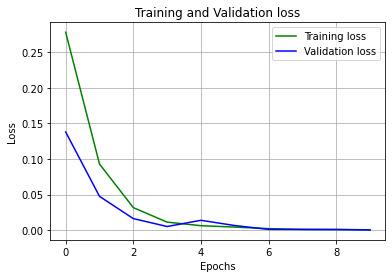

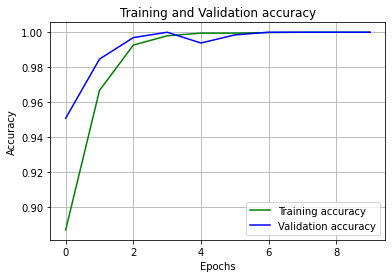

In [ ]:
# Plot the loss and accuracy

import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochsList = range(0, epochs)
plt.plot(epochsList, train_loss, 'g', label='Training loss')
plt.plot(epochsList, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochsList, train_acc, 'g', label='Training accuracy')
plt.plot(epochsList, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Confusion matrix as text

from sklearn.metrics import confusion_matrix

predict_x = model.predict(xtest) 
keras_pred = np.argmax(predict_x, axis=1)

print('Confusion matrix:', '\n', confusion_matrix(keras_pred, ytest))

Confusion matrix: 
 [[843   0]
 [  0 782]]


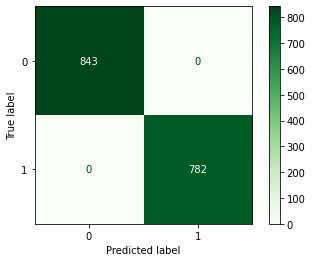

In [ ]:
# Confusion matrix from sklearn

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, keras_pred, cmap="Greens")

plt.grid(False)
plt.show()